In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ardi_data = pd.read_csv("Cleaned_1_data.csv")

ardi_data

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,ConditionType,Category,Cause_of_Death,Data_Value_Alt,Effect,ConsumptionPattern,Sex,AgeGroup,AgeGroup_Cat
0,2015,2019,WV,West Virginia,ARDI,Chronic,Total,Total for All Causes,0.0,Harmful Effects,Excessive Alcohol Use,Female,Overall,Overall
1,2015,2019,WV,West Virginia,ARDI,Total,Total,Total for All Causes,7.0,Harmful Effects,Excessive Alcohol Use,Female,Overall,Overall
2,2015,2019,US,United States,ARDI,Acute,Alcohol-Related Poisonings,Alcohol poisoning,13.0,Harmful Effects,Excessive Alcohol Use,Female,Under 21,Under 21
3,2015,2019,US,United States,ARDI,Acute,Alcohol-Related Poisonings,Alcohol poisoning,1761.0,Harmful Effects,Excessive Alcohol Use,Male,Overall,Overall
4,2015,2019,WV,West Virginia,ARDI,Acute,Total,Total for All Causes,367.0,Harmful Effects,Any Alcohol Use,Male,Overall,Overall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13142,2015,2019,WY,Wyoming,ARDI,Chronic,Total,Total for All Causes,83.0,Harmful Effects,Any Alcohol Use,Overall,65+,65 and older
13143,2015,2019,WY,Wyoming,ARDI,Total,Total,Total for All Causes,102.0,Harmful Effects,Any Alcohol Use,Overall,65+,65 and older
13144,2015,2019,WY,Wyoming,ARDI,Acute,Total,Total for All Causes,19.0,Harmful Effects,Excessive Alcohol Use,Overall,65+,65 and older
13145,2015,2019,WY,Wyoming,ARDI,Chronic,Total,Total for All Causes,77.0,Harmful Effects,Excessive Alcohol Use,Overall,65+,65 and older


In [3]:
# Based on location linear

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder


# Encode categorical variables
label_encoders = {}
categorical_columns = [ 'AgeGroup','Sex', 'ConditionType', 'Category','Cause_of_Death']  # List of categorical columns to encode

for col in categorical_columns:
    le = LabelEncoder()
    ardi_data[col] = le.fit_transform(ardi_data[col])
    label_encoders[col] = le

# Function to make predictions based on LocationAbbr using Linear Regression
def predict_by_location_linear(location):
    df_filtered = ardi_data[ardi_data['LocationAbbr'] == location]
    
    # Check if there are enough samples for splitting
    if len(df_filtered) < 2:
        raise ValueError("Insufficient samples for training and testing.")
    
    X = df_filtered[['AgeGroup','Sex', 'ConditionType', 'Category','Cause_of_Death']]  # Features
    y = df_filtered['Data_Value_Alt']  # Target
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    
    model = LinearRegression()  # Using Linear Regression
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
       
    
    linear_mse = mean_squared_error(y_test, y_pred)
    linear_mae = mean_absolute_error(y_test, y_pred)
    linear_r2 = r2_score(y_test, y_pred)
    
    return y_pred, linear_mse, linear_mae, linear_r2

# Example
# Example prediction using Linear Regression based on LocationAbbr
location = 'US'

prediction, linear_mse, linear_mae, linear_r2 = predict_by_location_linear(location)
print(f"Linear Regression Predicted values for '{location}':", prediction)
print("Mean Squared Error (MSE):", linear_mse)
print("Mean Absolute Error (MAE):", linear_mae)
print("R-squared (R2):", linear_r2)


Linear Regression Predicted values for 'US': [ 4.71039650e+01  2.09160430e+03  7.99179486e+03  5.29878202e+03
  3.40317802e+03  1.43086718e+03  2.09160430e+03  2.89262298e+03
 -1.96632654e+02  3.57739392e+03  5.89662735e+02  3.94762351e+03
  5.81920466e+03 -6.29362435e+01 -5.13504450e+02 -1.11095036e+01
  1.09392940e+02  5.87911321e+02  5.64233174e+02  4.47629763e+02
 -9.57498482e+02  1.27077359e+03  1.03033041e+03 -1.87515349e+03
 -2.32908417e+02  6.21971949e+03  3.23979734e+03  3.62417119e+03
  7.49114035e+03  3.58729445e+03  2.97425731e+02  5.10901514e+03
 -1.31454507e+03  4.35803886e+03  1.04839103e+03 -6.63697509e+02
  5.39891072e+03 -1.14396730e+03  8.38244060e+02  2.73725639e+02
 -2.81221356e+02  6.83101518e+03  5.36891123e+01  5.71907596e+03
  6.88107953e+03 -2.39557613e+03  2.68247601e+03  3.93774493e+03
 -5.56983656e+02  3.27700780e+03 -9.07434128e+02 -2.19531872e+03
  3.87653908e+02 -1.28499450e+01 -1.55438266e+03 -1.57476737e+03
 -5.51344181e+02  1.23060977e+03 -7.57241069e

In [4]:
# based on location Xgboost

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder


# Encode categorical variables
label_encoders = {}
categorical_columns = [ 'AgeGroup','Sex', 'ConditionType', 'Category','Cause_of_Death']  # List of categorical columns to encode

for col in categorical_columns:
    le = LabelEncoder()
    ardi_data[col] = le.fit_transform(ardi_data[col])
    label_encoders[col] = le

# Function to make predictions based on LocationAbbr using Linear Regression
def predict_by_location_xgboost(location):
    df_filtered = ardi_data[ardi_data['LocationAbbr'] == location]
    
    # Check if there are enough samples for splitting
    if len(df_filtered) < 2:
        raise ValueError("Insufficient samples for training and testing.")
    
    X = df_filtered[['AgeGroup','Sex', 'ConditionType', 'Category','Cause_of_Death']]  # Features
    y = df_filtered['Data_Value_Alt']  # Target
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


       
    model = XGBRegressor()  # Using XGBoost for regression
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    xgboost_mse = mean_squared_error(y_test, y_pred)
    xgboost_mae = mean_absolute_error(y_test, y_pred)
    xgboost_r2 = r2_score(y_test, y_pred)
    
    return y_pred, xgboost_mse, xgboost_mae, xgboost_r2

# Example
# Example prediction using Linear Regression based on LocationAbbr
location = 'US'

prediction, xgboost_mse, xgboost_mae, xgboost_r2 = predict_by_location_xgboost(location)
print(f"XGboost Predicted values for '{location}':", prediction)
print("Mean Squared Error (MSE):", xgboost_mse)
print("Mean Absolute Error (MAE):", xgboost_mae)
print("R-squared (R2):", xgboost_r2)


XGboost Predicted values for 'US': [-2.88777161e+01 -8.38525772e+01  1.63037659e+02 -2.44910259e+01
  1.73436951e+02  4.27756195e+01 -8.38525772e+01  5.67026939e+01
 -3.86642609e+01  7.73618603e+00  5.31478233e+01  5.22813187e+01
 -6.16115046e+00  2.21288925e+02  2.58953629e+01  3.96135750e+01
  1.00490623e+02  1.87790775e+01  1.91338593e+02  1.70821167e+02
 -1.89416332e+01 -2.26291016e+02 -1.32325165e+02  1.46976379e+03
  2.06199265e+01  1.09631592e+02  6.30799902e+03  2.09859644e+03
  5.72735519e+01 -5.04114151e+00 -1.17579941e+02  8.24350204e+01
 -1.88041550e+02  6.98139099e+02 -6.46114111e+00  1.44938822e+01
 -9.45181561e+00  5.62356234e-01  1.07193123e+02 -1.82907364e+02
  1.73694214e+02 -2.28198303e+02 -1.66426544e+01 -2.80215626e+01
 -5.06821198e+02  2.09588165e+02  9.89379425e+01  2.50409644e+03
 -1.70903072e+01  3.07358948e+02  2.36774826e+01 -3.64845200e+01
  2.50753494e+02  5.91218408e+03  6.60186863e+00  7.32380859e+03
 -7.08393764e+00  9.26318298e+02  2.99625702e+01  2.346

In [5]:
# based on location SVR

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

# # Load the dataset from ardi_data
# df = pd.read_csv('ardi_data.csv')

# Encode categorical variables
label_encoders = {}
categorical_columns = ['AgeGroup','Sex', 'ConditionType', 'Category','Cause_of_Death']  # List of categorical columns to encode

for col in categorical_columns:
    le = LabelEncoder()
    ardi_data[col] = le.fit_transform(ardi_data[col])
    label_encoders[col] = le

# Function to make predictions based on LocationAbbr using SVR
def predict_by_location_svr(location):
    df_filtered = ardi_data[ardi_data['LocationAbbr'] == location]
    
    # Check if there are enough samples for splitting
    if len(df_filtered) < 2:
        raise ValueError("Insufficient samples for training and testing.")
    
    X = df_filtered[['AgeGroup','Sex', 'ConditionType', 'Category','Cause_of_Death']]  # Features
    y = df_filtered['Data_Value_Alt']  # Target
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    
    # model = SVR(kernel='linear')  # Using a linear kernel for SVR
    # model.fit(X_train, y_train)
    # y_pred = model.predict(X_test)
    model = SVR(kernel='rbf')  # Using RBF kernel for SVR
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)
    
    svr_mse = mean_squared_error(y_test, y_pred)
    svr_mae = mean_absolute_error(y_test, y_pred)
    svr_r2 = r2_score(y_test, y_pred)
    
    return y_pred, svr_mse, svr_mae, svr_r2

# Example prediction using SVR based on LocationAbbr
location = 'US'

prediction, svr_mse, svr_mae, svr_r2 = predict_by_location_svr(location)
print(f"SVR Predicted values for '{location}':", prediction)
print("Mean Squared Error (MSE):", svr_mse)
print("Mean Absolute Error (MAE):", svr_mae)
print("R-squared (R2):", svr_r2)


SVR Predicted values for 'US': [46.40707533 40.47674241 45.89811192 43.4093837  51.5636094  40.02735563
 40.47674241 63.10480745 39.40991954 51.55143861 43.64933378 51.90000003
 46.81804491 38.49593443 45.0639524  48.5582517  39.19657291 38.21821672
 38.87998849 46.50285004 40.06678197 47.30629461 48.49896557 47.42702791
 37.08559027 54.95476606 49.55219331 41.34691677 45.49172232 39.897637
 43.93738405 52.96906756 48.53282342 47.18568491 38.45149924 46.51660861
 45.20007704 36.15688837 37.44618317 40.69584423 42.43977056 52.25025719
 37.34261009 45.07885092 53.30868421 47.04600494 62.6269656  45.54240211
 36.67258239 45.16092428 39.54938173 45.18430343 37.94660679 44.15432184
 36.32587023 44.58741652 38.8205014  38.73690536 38.12035774 44.10434577
 37.7237102  50.81088372 38.96023207 62.54966065 37.74415558 40.69584423
 39.10676188 37.04126553 38.88845266 42.43977056 46.38289525 43.03909825
 39.5011861  38.6028721  43.79799105 56.43170751 38.26226078 40.63922736
 60.34287857 61.727007

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoders = {}
categorical_columns = ['AgeGroup', 'Sex', 'ConditionType', 'Category', 'Cause_of_Death']  # List of categorical columns to encode

for col in categorical_columns:
    le = LabelEncoder()
    ardi_data[col] = le.fit_transform(ardi_data[col])
    label_encoders[col] = le

# Function to make predictions based on LocationAbbr using Random Forest
def predict_by_location_random_forest(location):
    df_filtered = ardi_data[ardi_data['LocationAbbr'] == location]
    
    # Check if there are enough samples for splitting
    if len(df_filtered) < 2:
        raise ValueError("Insufficient samples for training and testing.")
    
    X = df_filtered[['AgeGroup', 'Sex', 'ConditionType', 'Category', 'Cause_of_Death']]  # Features
    y = df_filtered['Data_Value_Alt']  # Target
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestRegressor()  # Using RandomForestRegressor for regression
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    rf_mse = mean_squared_error(y_test, y_pred)
    rf_mae = mean_absolute_error(y_test, y_pred)
    rf_r2 = r2_score(y_test, y_pred)
    
    return y_pred, rf_mse, rf_mae, rf_r2

# Example prediction using Random Forest based on LocationAbbr
location = 'US'

prediction, rf_mse, rf_mae, rf_r2 = predict_by_location_random_forest(location)
print(f"Random Forest Predicted values for '{location}':", prediction)
print("Mean Squared Error (MSE):", rf_mse)
print("Mean Absolute Error (MAE):", rf_mae)
print("R-squared (R2):", rf_r2)


Random Forest Predicted values for 'US': [8.25000000e+00 2.75860000e+02 6.73200000e+01 1.30000000e-01
 1.43396667e+02 2.78750000e+02 2.75860000e+02 8.27000000e+01
 8.85216667e+00 4.55316667e+00 2.05453333e+02 1.62341667e+02
 2.46000000e+00 2.08000000e+00 1.86770000e+02 1.78270000e+02
 5.44700000e+01 4.13000000e+00 1.08118000e+02 2.97650000e+02
 3.20000000e-01 9.15900000e+01 3.35240000e+02 1.54761000e+03
 6.45333333e+00 1.44314000e+02 1.32848000e+03 2.20722833e+03
 1.66800000e+01 3.66000000e+00 1.54000000e+01 4.49408333e+01
 9.96000000e+00 3.20070000e+02 3.15000000e+00 1.32920000e+02
 4.54500000e+00 4.99166667e+00 1.90840000e+02 3.26815667e+02
 5.16050000e+01 4.04850000e+01 3.10000000e-01 1.16366667e+01
 9.00000000e-01 1.70180000e+02 2.46166667e+01 9.24248833e+02
 2.00000000e-02 4.00214167e+02 2.80000000e-01 1.53700000e+01
 1.32760000e+02 8.59592000e+03 1.57000000e+00 7.99971000e+03
 1.93100000e+01 8.71900000e+02 0.00000000e+00 1.09200000e+01
 2.50000000e+00 2.01908333e+01 3.40560000e+0

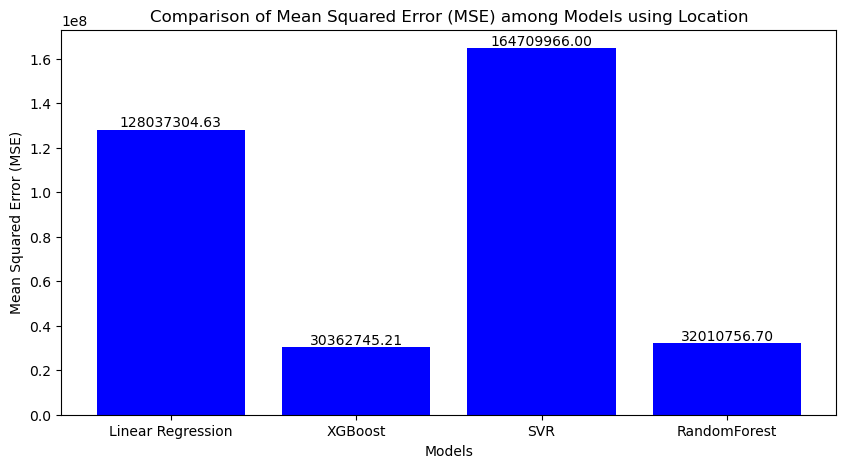

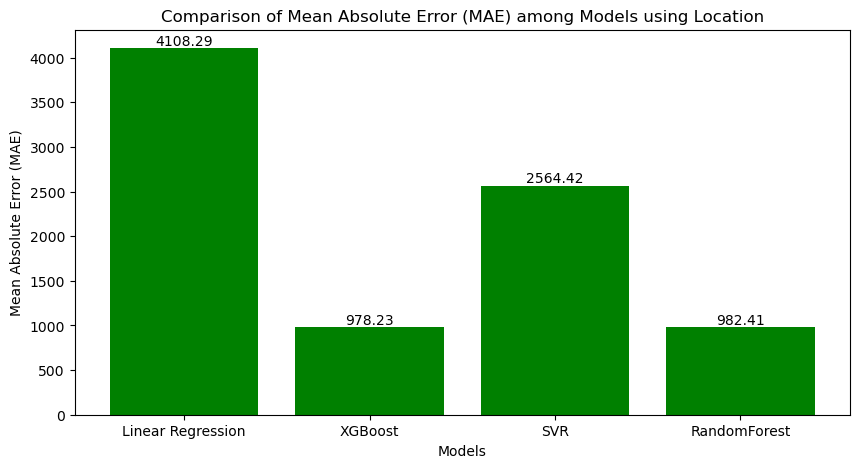

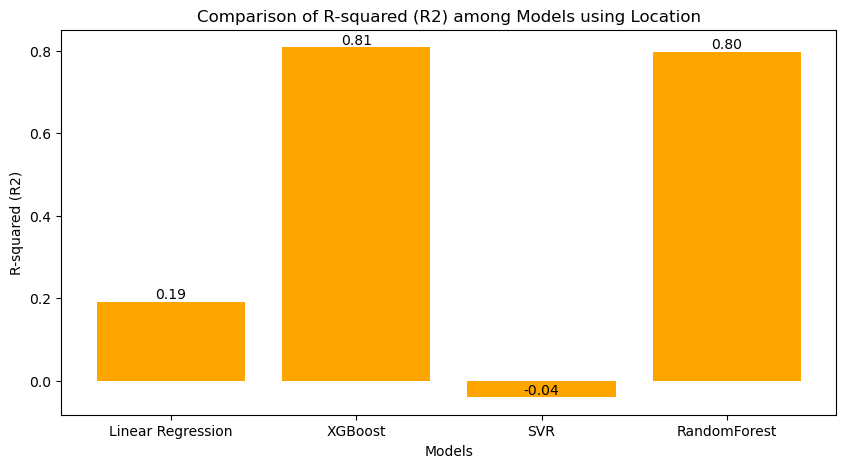

In [7]:
import matplotlib.pyplot as plt

# Create a list of model names and their respective metrics
models = ['Linear Regression', 'XGBoost', 'SVR', 'RandomForest']
mse_scores = [linear_mse, xgboost_mse, svr_mse, rf_mse]
mae_scores = [linear_mae, xgboost_mae, svr_mae,rf_mae]
r2_scores = [linear_r2, xgboost_r2, svr_r2,rf_r2]

# Plot Mean Squared Error (MSE)
plt.figure(figsize=(10, 5))
bars = plt.bar(models, mse_scores, color='blue')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of Mean Squared Error (MSE) among Models using Location')

# Add annotations to the bars
for bar, mse in zip(bars, mse_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{mse:.2f}', ha='center', va='bottom')

plt.show()


# Plot Mean Absolute Error (MAE)
plt.figure(figsize=(10, 5))
bars = plt.bar(models, mae_scores, color='green')
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Comparison of Mean Absolute Error (MAE) among Models using Location')
# Add annotations to the bars
for bar, mae in zip(bars, mae_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{mae:.2f}', ha='center', va='bottom')

plt.show()

# Plot R-squared (R2)
plt.figure(figsize=(10, 5))
bars = plt.bar(models, r2_scores, color='orange')
plt.xlabel('Models')
plt.ylabel('R-squared (R2)')
plt.title('Comparison of R-squared (R2) among Models using Location')
# Add annotations to the bars
for bar, r2 in zip(bars, r2_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{r2:.2f}', ha='center', va='bottom')

plt.show()

